In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
BASE_DIR = Path.cwd().parent

In [3]:
df_hosts_reviews_en = pd.read_parquet(BASE_DIR / 'staging_data' / 'hosts_reviews_en_cleaned.parquet')

In [5]:
df_hosts_reviews_en.head()

,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,neighbourhood,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
0,2010-09-06,0.0,32984.0,200247.0,Keenan,great little apartment perfect spot town nice ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",Kungsholmens,...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
1,2010-09-12,0.0,32984.0,126543.0,Olaf,nice flat great area chris sorted things make ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",Kungsholmens,...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
2,2011-05-21,0.0,32984.0,294223.0,Max,great location chris responsive email country ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",Kungsholmens,...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
3,2011-05-28,0.0,32984.0,577190.0,Eli,chris place super great close everything quite...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",Kungsholmens,...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
4,2011-06-11,0.0,32984.0,521818.0,Jonathan,nice apartment great location great price br b...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",Kungsholmens,...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en


In [4]:
df_hosts_reviews_en.groupby('review_scores_rating')['comments'].count().sort_values(ascending=False)

review_scores_rating
5.00    4547
4.92    3527
4.84    2408
4.83    2375
4.86    2194
        ... 
3.40       4
2.50       4
3.75       3
2.00       2
1.50       1
Name: comments, Length: 114, dtype: int64

In [5]:
df_hosts_reviews_en['comments'][1]

'nice flat great area chris sorted things make stay smooth easy leaving key neighbours etc thanks'

In [22]:
df_hosts_reviews_en.query('listing_id_encod == 1285')

,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,neighbourhood,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
63689,2019-07-15,1285.0,35930154.0,86501510.0,David,apartment welllocated metro 5 min walk host ni...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63690,2019-07-24,1285.0,35930154.0,193898979.0,Ella,hes nice kinda lacking everything else guesbrt...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63691,2019-07-28,1285.0,35930154.0,22855458.0,Salma,good location price however room rented one de...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63692,2022-10-03,1285.0,35930154.0,13501270.0,Haizhou,communication wait apartment without anyone sh...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en


In [16]:
df_hosts_reviews_en.query('review_scores_rating < 3')

,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,neighbourhood,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
31709,2017-08-05,638.0,1.836942e+07,13333455.0,Lara,madelaine nice person available time even aske...,17283764.0,Madelaine,Familjevänlig lägenhet mkt centralt på kungsho...,Kungsholmens,...,0.01,0.0,2.0,1.0,1.0,4.00,5.0,5.00,1.0,en
63689,2019-07-15,1285.0,3.593015e+07,86501510.0,David,apartment welllocated metro 5 min walk host ni...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63690,2019-07-24,1285.0,3.593015e+07,193898979.0,Ella,hes nice kinda lacking everything else guesbrt...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63691,2019-07-28,1285.0,3.593015e+07,22855458.0,Salma,good location price however room rented one de...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
63692,2022-10-03,1285.0,3.593015e+07,13501270.0,Haizhou,communication wait apartment without anyone sh...,270253234.0,Mehdi,Room in a large apartment for rent during July...,Hägersten-Liljeholmens,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
64346,2022-06-26,1324.0,3.675865e+07,341209083.0,"O,B",house really dirty smelled horrible,72819688.0,Sam,Big 2 Room Apartment. A very big 2 room apartm...,Hässelby-Vällingby,...,0.11,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,en
68795,2022-08-25,1362.0,3.758750e+07,476240802.0,Jan,dont book phone number host assigned host answer,283964182.0,Sofia,Sovrum med tillgång till hela lägenheten vid b...,Älvsjö,...,0.14,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,en
74035,2022-08-10,1574.0,4.354639e+07,98082896.0,Daniel,dont stay herebrbrunless want use place sleep ...,67355594.0,Pernilla,Lustiga huset i Hökarängen! Etagelägenhet med ...,Farsta,...,0.13,1.0,1.0,1.0,1.0,4.00,2.0,4.00,1.0,en
86391,2022-06-21,2093.0,5.788862e+17,220587752.0,Jonathan,walked supposed smokefree unit reeked smoke sm...,310835509.0,TravelNest,rsta 342 3-4 bed Apartment Stockholm <b>The sp...,Enskede-Årsta-Vantörs,...,0.20,2.0,1.5,2.0,1.5,2.00,2.0,1.50,1.5,en
91215,2022-11-01,2497.0,6.924256e+17,452097355.0,Stella,worst experience host since use platform askin...,36019300.0,These,Mysig lägenhet med uteplats mitt i city Välkom...,Kungsholmens,...,0.20,1.0,2.0,3.0,2.0,1.00,3.0,5.00,2.0,en


In [6]:
import nltk
nltk.download('vader_lexicon')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
a = df_hosts_reviews_en['comments'][63690]

vds.polarity_scores(a)

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


{'neg': 0.124, 'neu': 0.789, 'pos': 0.087, 'compound': -0.34}

In [7]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [8]:
df = df_hosts_reviews_en.head(10000)

In [9]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df['comments'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[1])

['nice', 'flat', 'great', 'area', 'chris', 'sorted', 'things', 'make', 'stay', 'smooth', 'easy', 'leaving', 'key', 'neighbours', 'etc', 'thanks']


In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words) 

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.041*"walk" + 0.030*"family" + 0.027*"minute" + 0.021*"kitchen" + 0.017*"station" + 0.017*"day" + 0.015*"breakfast" + 0.013*"short" + 0.013*"take" + 0.012*"big"'), (1, '0.035*"home" + 0.027*"make" + 0.027*"feel" + 0.023*"welcome" + 0.023*"area" + 0.023*"house" + 0.022*"friendly" + 0.021*"breakfast" + 0.020*"stay" + 0.018*"helpful"'), (2, '0.046*"stay" + 0.046*"great" + 0.044*"place" + 0.034*"nice" + 0.029*"apartment" + 0.029*"location" + 0.029*"host" + 0.027*"recommend" + 0.022*"close" + 0.020*"city"'), (3, '0.091*"good" + 0.052*"quiet" + 0.028*"night" + 0.020*"metro" + 0.020*"travel" + 0.019*"right" + 0.019*"convenient" + 0.016*"food" + 0.016*"include" + 0.013*"share"')]


In [12]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.6768,"stay, great, place, nice, apartment, location,...","[great, little, apartment, perfect, spot, town..."
1,1,1,0.5777,"home, make, feel, welcome, area, house, friend...","[nice, flat, great, area, sort, thing, make, s..."
2,2,2,0.7419,"stay, great, place, nice, apartment, location,...","[great, location, responsive, email, country, ..."
3,3,2,0.6833,"stay, great, place, nice, apartment, location,...","[place, super, great, close, quite, central, m..."
4,4,2,0.5269,"stay, great, place, nice, apartment, location,...","[nice, apartment, great, location, great, pric..."


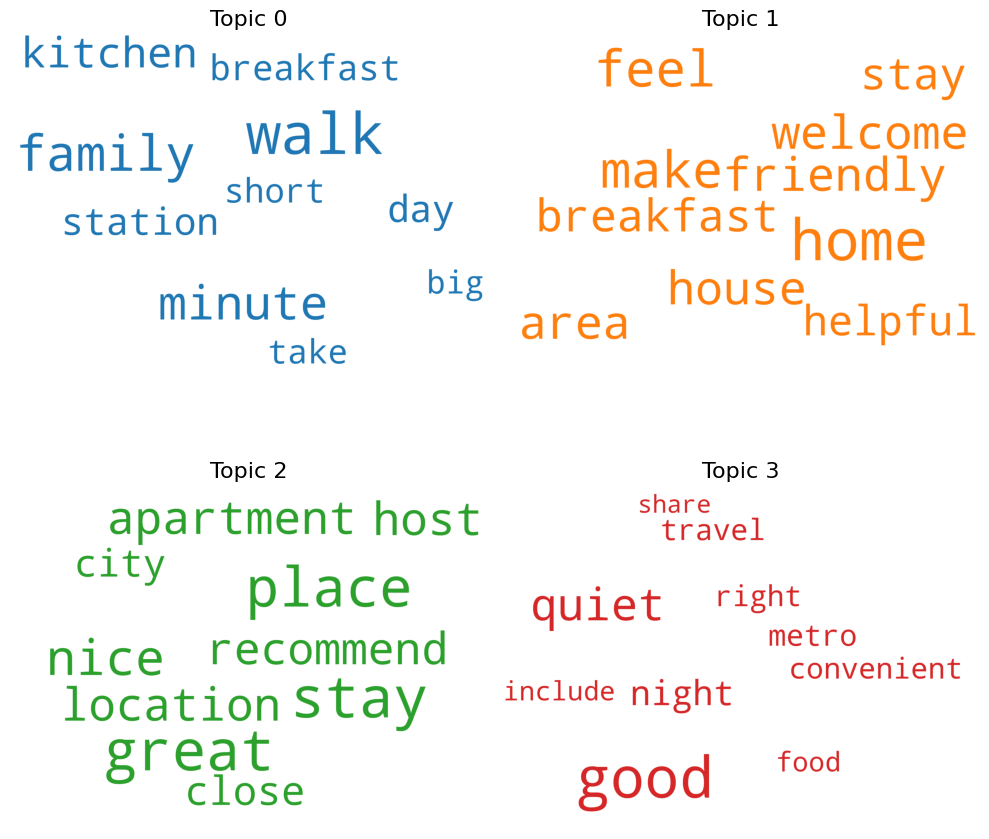

In [13]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [14]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.309189  0.080807       1        1  47.616634
1      0.082151 -0.011367       2        1  23.166563
0     -0.125124 -0.301484       3        1  18.893875
3     -0.266217  0.232043       4        1  10.322928, topic_info=          Term         Freq        Total Category  logprob  loglift
44        good  2224.000000  2224.000000  Default  30.0000  30.0000
7        great  5158.000000  5158.000000  Default  29.0000  29.0000
52       place  4891.000000  4891.000000  Default  28.0000  28.0000
87        walk  1823.000000  1823.000000  Default  27.0000  27.0000
165      quiet  1260.000000  1260.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
855   anywhere   132.841150   133.695645   Topic4  -5.2117   2.2644
2425      rule   239.924392   243.156025   Topic4  -4.6205   2.2574
1051     world   140.926997   143.761679   Topic4  -5.1526   2.2509
514       know   199.550215   315.003274   Topic4  -4.8048   1.8143
8805     andre   151.310778   897.934713   Topic4  -5.0815   0.4900

[179 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
476       2  0.996048     absolutely
297       3  0.996093  accommodation
775       4  0.998889         airbnb
246       1  0.999576           also
8805      1  0.380874          andre
...     ...       ...            ...
235       1  0.607258      wonderful
235       2  0.392229      wonderful
1051      1  0.006956          world
1051      2  0.013912          world
1051      4  0.980790          world

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])